---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [142]:
!pip install scikit-plot

In [143]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import scikitplot as skplt
import matplotlib.pyplot as plt

# importar scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# importar biblioteca imblearn para balanceamento dados
from imblearn.under_sampling import RandomUnderSampler

# Exibição amigável para notebooks
%matplotlib inline

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [144]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

In [145]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [146]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [147]:
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

Dimensões do Dataset 
Variáveis:  31 
Entradas:  284807


In [148]:
pd.DataFrame.describe(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [149]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False) * 100

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

In [150]:
#Verificar o balanceamento dos dados
print("\n Fraudes representam {:.4f}% do dataset original.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))


 Fraudes representam 0.1727% do dataset original.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

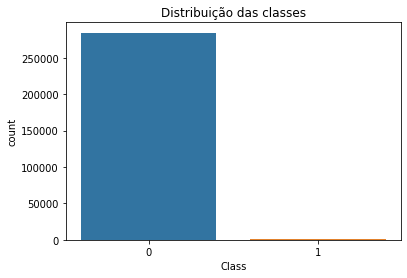

In [151]:
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title("Distribuição das classes")
plt.plot()

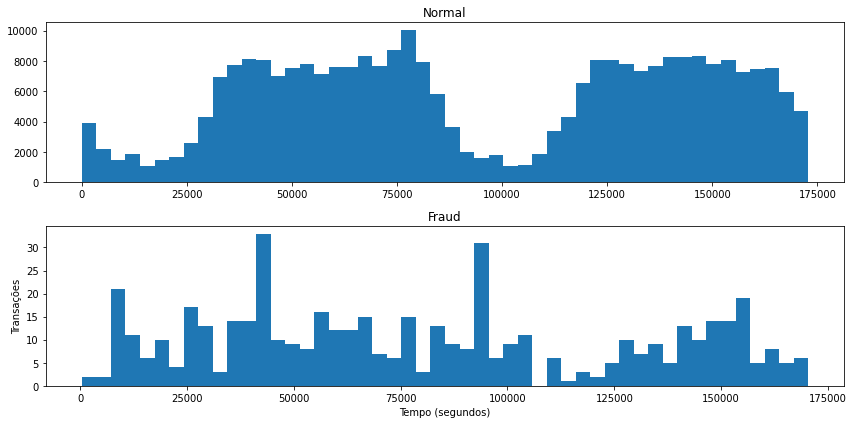

In [152]:
fig, ax = plt.subplots(nrows = 2, ncols=1, figsize = (12,6))
num_bins = 50

ax[0].hist(df.Time[df.Class == 0], bins=num_bins)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins)
ax[1].set_title('Fraud')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

Através do gráfico box abaixo, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de *machine learning*.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


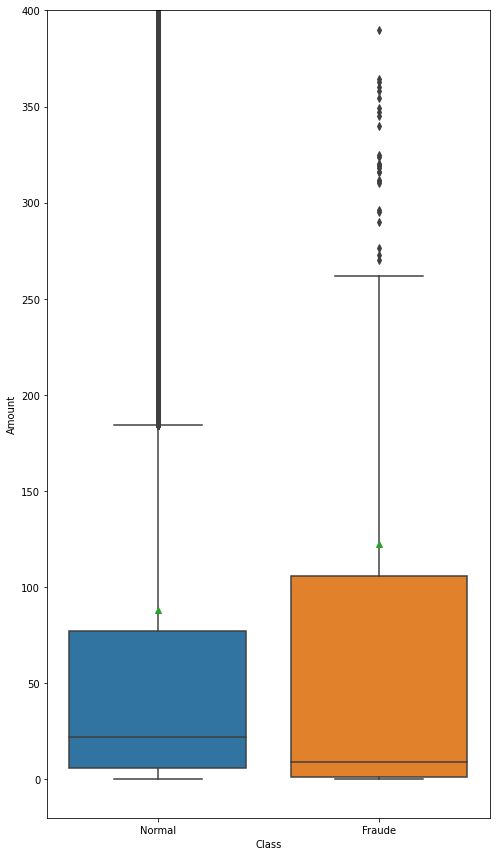

In [153]:
fig, ax = plt.subplots(figsize=(7,12), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

In [170]:
df[(df.Class == 1) & (df.Amount < 2000)]['Amount'].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias.

O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis `V3`, `V4`, `V10` e `V11`, como elas são bem distintas.

Por outro lado, variáveis como `V8`, `V13` e `V15` são muito similares, apresentando aproximadamente o mesmo comportamento.

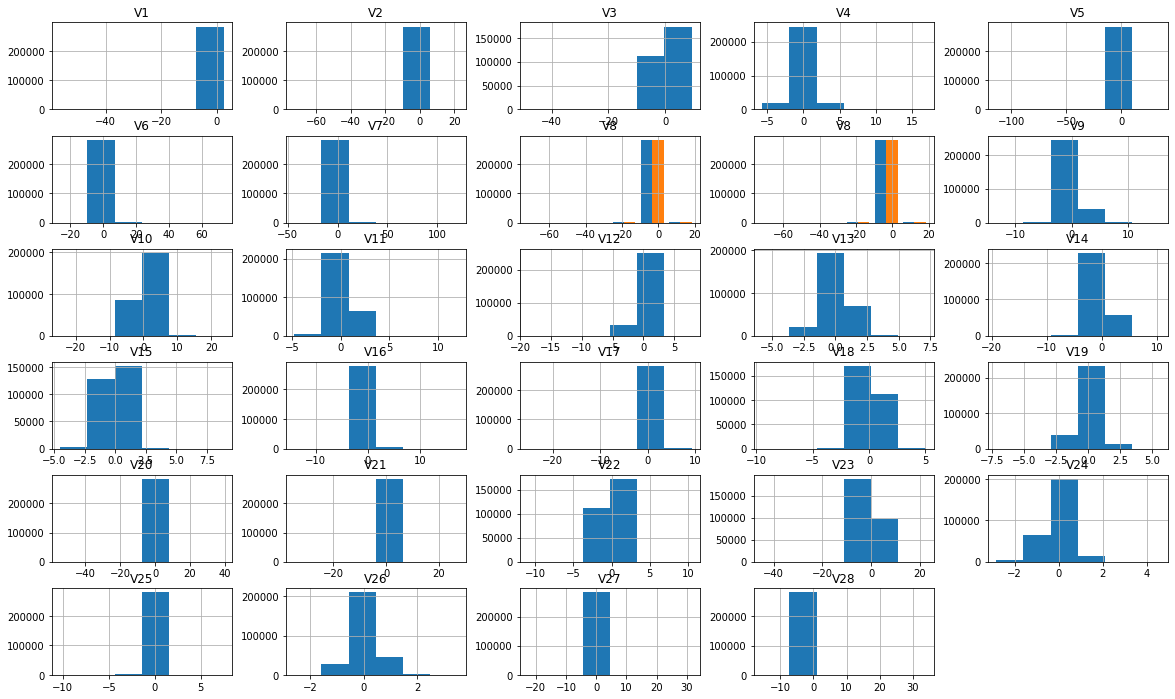

In [155]:
# Visualizando a distribuição de cada variável
values = ['V1','V2','V3','V4','V5','V6','V7','V8','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17',
          'V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
df[values].hist(bins=6, figsize=(20,12));

Resumidamente, algumas observações principais que puderam ser extraídas dessa etapa exploratória foram:

* O *dataset* está muito desbalanceado, uma vez que as transações fraudulentas representam apenas 0,17% das entradas totais.
* Não existem valores ausentes ou nulos no *dataframe*.
* Uma vez que a PCA é sensível à escala das variáveis, assume-se a premissa que as *features* originais foram padronizadas.
* As colunas `Time` e `Amount` não estão normalizadas.

## Preparação dos Dados

Antes de que os dados possam ser utilizados como input para algoritmos de machine learning, muitas vezes eles precisam ser tratados, formatados e reestruturados — este processo é conhecido como **pré-processamento**. Felizmente neste conjunto de dados não existem registros inconsistentes para tratamento, porém algumas colunas precisam ser ajustadas. Este pré-processamento pode ajudar muito com o resultado e poder de predição de quase todos os algoritmos de aprendizado.



Para que os dados possam alimentar o modelo de Regressão Logística que iremos construir, nesta etapa de preparação iremos:
* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* [*Recomendado*] Balancear o conjunto de dados

**Padronizar `Time` e `Amount`**

Para esta etapa, uma vez que a coluna `Amount` possui *outliers* será usada a padronização por meio da classe `StandardScaler`.

In [156]:
# padronizar as colunas Time e Amount
df_clean = df.copy()
std_scaler = StandardScaler()
df_clean['std_Amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_Time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))

df_clean.drop(['Time','Amount'], axis = 1, inplace = True)

#Verificar as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_Amount,std_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Divisão de dados de treino e teste**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre treino e teste. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado.

Para garantir que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente, passamos `stratify=True`.

In [157]:
#Separar as variáveis entre X e Y
X = df_clean.drop('Class', axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,shuffle = True, random_state = 0)

**Resultado dos dados divididos**

Já que dividimos os dados de treino e test, vamos verificar a quantidade de amostras que temos de cada um

In [158]:
print ("Training set has {} samples".format(X_train.shape[0]))
print ("Test set has {} samples".format(X_test.shape[0]))

Training set has 213605 samples
Test set has 71202 samples


**Balanceamento dos dados**
Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar *Under-sampling*, preservando a classe minoritária.
Sobre a biblioteca tem esse [artigo](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) interessante.

É fácil ver que não há mais aquela discrepância inicial (gráfico de barras no início deste *notebook*).

1    369
0    369
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


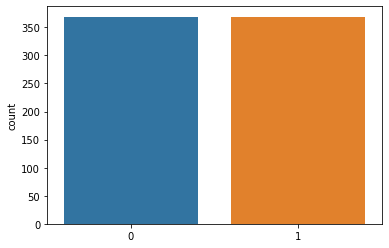

In [159]:
#Técnica under - sampling, neste caso utilizei o argumento para maioridade dos dados 
rus = RandomUnderSampler(sampling_strategy='majority')
X_rus, y_rus = rus.fit_sample(X_train, y_train)

print(pd.Series(y_rus).value_counts());

sns.countplot(y_rus);

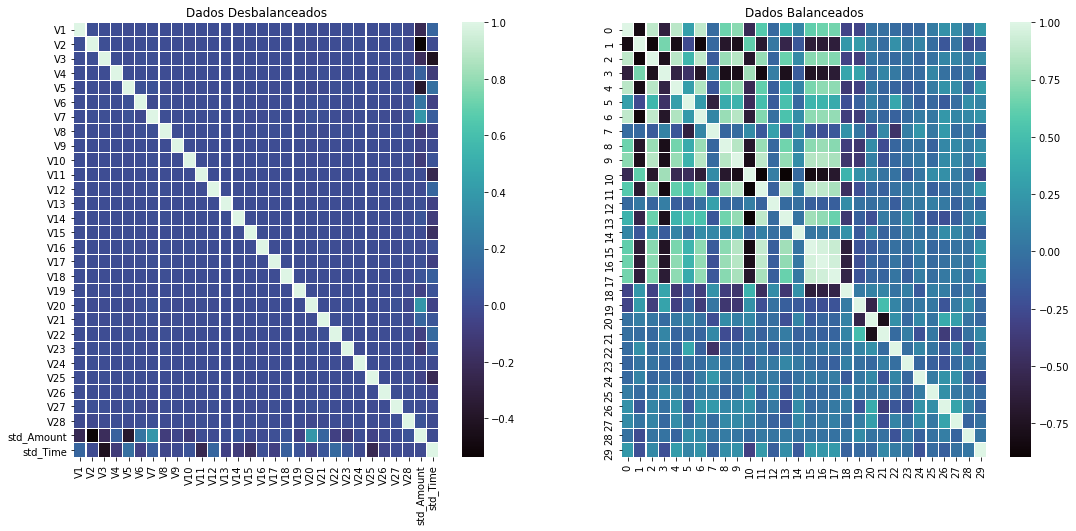

In [160]:
# Plotagem da matriz de correlação
correlacao = X_train.corr()
correlacao_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows = 1, ncols=2,figsize = (18,8))


sns.heatmap(correlacao, xticklabels=correlacao.columns, yticklabels=correlacao.columns,
            linewidths=.2, cmap="mako", ax=ax[0])
ax[0].set_title('Dados Desbalanceados')

sns.heatmap(correlacao_rus, xticklabels=correlacao_rus.columns, yticklabels=correlacao_rus.columns,
            linewidths=.1, cmap="mako",ax=ax[1])

ax[1].set_title('Dados Balanceados')

plt.show()

## Modelo de Machine Learning


*Através* dos quatro modelos de algoritmos de classificação, segue um breve resumo de cada modelo com suas vantagens e desvantagens.

1. Regressão Logística

    - A aplicação da regressão logística pode ser usada em empresas de cartão de crédito e empréstimos afim de prever inadimplência. 

    - Vantagens: É mais robusto, as variáveis independentes não precisam ser distribuídas normalmente ou têm variações iguais em cada grupo. Normalmente, os termos de erro distribuídos não são assumidos.

    - Desvantagens: A regressão logística tende a apresentar um desempenho inferior quando existem limites de decisão múltiplos ou não lineares.

 

2. Árvores de Decisão

    - Uma aplicação no mundo real é identificar características a serem usadas em dispositivos implantáveis no campo de medicina (Eletrocardiograma Miocárdico)

    - Vantagens: As árvores de decisão podem aprender relacionamentos não lineares e são bastante robustas para outliers. Os conjuntos funcionam muito bem na prática, ganhando muitas competições de aprendizado de máquina clássicas (isto é, sem aprendizado profundo).

    - Desvantagens: Árvores individuais e não restritas são propensas a overfitting porque podem manter ramificações até memorizarem os dados de treinamento. No entanto, isso pode ser aliviado usando conjuntos.

    - Pode ser útil para este problema, pois temos vários recursos e ele aprenderá automaticamente as interações desses recursos.

3. Classificador de Floresta Aleatória

    - Um exemplo prático no mundo real, é o sensoriamento remoto da terra, através de classificação de imagens. 

    - Vantagens: O algoritmo é muito prático e fácil de usar, porque os hiperparâmetros padrão geralmente produzem um bom resultado de previsão. O número de hiperparâmetros também não é tão alto e eles são fáceis de entender.

    - Desvantagens: Um dos grandes problemas no aprendizado de máquina é o ajuste excessivo, mas na maioria das vezes isso não será fácil para um classificador de floresta aleatório.

   - Pode apresentar um candidato melhor que a arvore de decisão, porque evita overfitting e fornece melhor precisão. 

4. Classificador de Ada Boost

 - Um exemplo de aplicação é com detecção de rostos em imagens de baixa resolução.

 - Vantagens: Fácil entendimento de visualização, relativamente robusto com overfitting.

  - Desvantagens: Para o AdaBoost, quando a quantidade de ruído é alta, a perfomance tende -se a degradar.


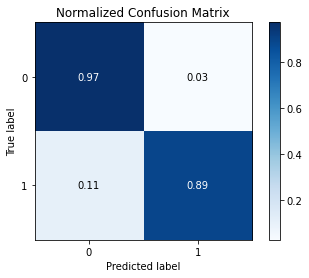

In [161]:
#Instanciar e treinar o modelo de regressão logística
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [162]:
# imprimir relatório de classificação do modelo de regressão logística
print("Relatório de Classificação do modelo de Regressão Logística:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo de regressão logística
print("Acurácia do modelo de Regressão Logística: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva do modelo de regressão logística
print("AUC do modelo de Regressão Logística: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação do modelo de Regressão Logística:
               precision    recall  f1-score   support

           0     0.9998    0.9832    0.9915     71079
           1     0.0838    0.8862    0.1532       123

    accuracy                         0.9831     71202
   macro avg     0.5418    0.9347    0.5723     71202
weighted avg     0.9982    0.9831    0.9900     71202

Acurácia do modelo de Regressão Logística: 0.9831

AUC do modelo de Regressão Logística: 0.9347



In [163]:
#instanciar e treinar o modelo de arvores de decisão
np.random.seed(4)
model_arvore_decisao = DecisionTreeClassifier()
model_arvore_decisao.fit(X_rus, y_rus)

y_pred_arvore_decisao = model_arvore_decisao.predict(X_test)
y_prova_arvore_decisao = model_arvore_decisao.predict_proba(X_test)

Relatório de Classificação do modelo de Arvore de Decisão:
               precision    recall  f1-score   support

           0     0.9997    0.9106    0.9531     71079
           1     0.0163    0.8537    0.0319       123

    accuracy                         0.9105     71202
   macro avg     0.5080    0.8821    0.4925     71202
weighted avg     0.9980    0.9105    0.9515     71202

Acurácia do modelo de Arvore de Decisão: 0.9105

AUC do modelo de Arvore de Decisão: 0.8821



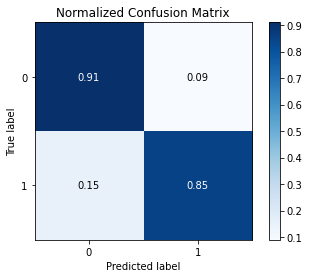

In [164]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_arvore_decisao, normalize=True)

# imprimir relatório de classificação do modelo de Arvore de decisão
print("Relatório de Classificação do modelo de Arvore de Decisão:\n", classification_report(y_test, y_pred_arvore_decisao, digits=4))

# imprimir a acurácia do modelo de Arvore de decisão
print("Acurácia do modelo de Arvore de Decisão: {:.4f}\n".format(accuracy_score(y_test, y_pred_arvore_decisao)))

# imprimir a área sob da curva do modelo de Arvore de decisão
print("AUC do modelo de Arvore de Decisão: {:.4f}\n".format(roc_auc_score(y_test, y_pred_arvore_decisao)))

In [165]:
## Construir modelo de Floresta Aleatória

#instanciar e treinar o modelo de Floresta Aleatória
np.random.seed(4)
model_floreta_aleatoria = RandomForestClassifier()
model_floreta_aleatoria.fit(X_rus, y_rus)

y_pred_floreta_aleatoria = model_floreta_aleatoria.predict(X_test)
y_prova_floreta_aleatoria = model_floreta_aleatoria.predict_proba(X_test)

Relatório de Classificação do modelo de Floresta Aleatória:
               precision    recall  f1-score   support

           0     0.9998    0.9826    0.9911     71079
           1     0.0811    0.8862    0.1486       123

    accuracy                         0.9825     71202
   macro avg     0.5405    0.9344    0.5699     71202
weighted avg     0.9982    0.9825    0.9897     71202

Acurácia do modelo de Floresta Aleatória: 0.9825

AUC do modelo de Floresta Aleatória: 0.9344



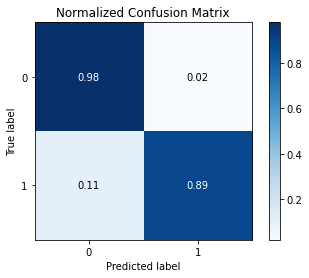

In [166]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_floreta_aleatoria, normalize=True)

# imprimir relatório de classificação do modelo de Floresta Aleatória
print("Relatório de Classificação do modelo de Floresta Aleatória:\n", classification_report(y_test, y_pred_floreta_aleatoria, digits=4))

# imprimir a acurácia do modelo de Floresta Aleatória
print("Acurácia do modelo de Floresta Aleatória: {:.4f}\n".format(accuracy_score(y_test, y_pred_floreta_aleatoria)))

# imprimir a área sob da curva do modelo de Floresta Aleatória
print("AUC do modelo de Floresta Aleatória: {:.4f}\n".format(roc_auc_score(y_test, y_pred_floreta_aleatoria)))

Como uma forma de testar outro algoritmo, vamos utilizar o AdaBoostClassifier, que pode ser encontrado na biblioteca sklearn.

In [167]:
from sklearn.ensemble import AdaBoostClassifier

#instanciar e treinar o modelo de arvores de decisão
np.random.seed(4)
model_boost_classifier = AdaBoostClassifier()
model_boost_classifier.fit(X_rus, y_rus)

y_pred_boost_classifier = model_boost_classifier.predict(X_test)
y_prova_boost_classifier = model_boost_classifier.predict_proba(X_test)


Relatório de Classificação do modelo de AdaBoost:
               precision    recall  f1-score   support

           0     0.9998    0.9538    0.9763     71079
           1     0.0327    0.9024    0.0631       123

    accuracy                         0.9537     71202
   macro avg     0.5163    0.9281    0.5197     71202
weighted avg     0.9982    0.9537    0.9747     71202

Acurácia do modelo de AdaBoost: 0.9537

AUC do modelo de AdaBoost: : 0.9281



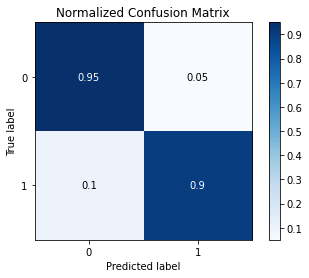

In [168]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_boost_classifier, normalize=True)


# imprimir relatório de classificação do modelo de AdaBoost
print("Relatório de Classificação do modelo de AdaBoost:\n", classification_report(y_test, y_pred_boost_classifier, digits=4))

# imprimir a acurácia do modelo de AdaBoost
print("Acurácia do modelo de AdaBoost: {:.4f}\n".format(accuracy_score(y_test, y_pred_boost_classifier)))

# imprimir a área sob da curva do modelo de AdaBoost
print("AUC do modelo de AdaBoost: : {:.4f}\n".format(roc_auc_score(y_test, y_pred_boost_classifier)))

Conforme o relatório de classificação acima, temos algumas métricas que devemos considerar, para entender melhor, vamos a definição de cada uma:

** Accuracy ** mede com que frequência o classificador faz a predição correta. É a proporção entre o número de predições corretas e o número total de predições (o número de registros testados).

`[(Verdadeiros positivos + Verdadeiros negativos) /(Verdadeiros positivos + Falso positivos + Verdadeiros negativos + Falso negativos)]`


** Precision ** informa qual a proporção de transações classificamos como fraude eram realmente fraude. Ou seja, é a proporção de verdadeiros positivos (mensagens classificadas como fraude que eram realmente fraude) sobre todos os positivos (todas as transações classificadas como fraude, independente se a classificação estava correta).

`[Verdadeiros positivos/(Verdadeiros positivos + Falso positivos)]`

** Recall(sensibilidade)** nos informa qual a proporção das transações que eram fraudes que foram corretamente classificadas  como fraude. É a proporção entre os verdadeirs positivos (Classificados como fraude, que realmente era fraude) sobre todas as transações financeiras quem realmente era fraudes.

`[Verdadeiros positivos/(Verdadeiros positivos + Falso negativos)]`

**F1 Score** nos informa a média harmônica entre `precision` e `recall`, neste caso quanto maior o F1 Score, as duas métricas também serão maiores, porém é importante ficar atendo individualmente as métricas `precision` e `recall`. 

`[(2 * (precision * recall) / (precision + recall)]`

## Avaliar o desempenho do modelo

Através do desemprenho dos modelos, vamos rever a tabela de classificação dos quatro modelos e analisar qual a melhor métrica dos modelos.

 Baseado na dos modelos descritos, qual dos quatro modelos poderá ser melhor com as métricas utilizadas. 

Qual modelo possui o maior score? A resposta deve abranger os seguintes pontos:
* Em cada métrica como o modelo se comportou ?.
* No problema explorado, há alguma métrica que é importante enfatizar?

In [169]:
# imprimir a acurácia dos três modelos
print("Acurácia do modelo de Regressão Logística: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
print("Acurácia do modelo de Arvore de Decisão: {:.4f}\n".format(accuracy_score(y_test, y_pred_arvore_decisao)))
print("Acurácia do modelo de Floresta Aleatória: {:.4f}\n".format(accuracy_score(y_test, y_pred_floreta_aleatoria)))
print("Acurácia do modelo de AdaBoost: {:.4f}\n".format(accuracy_score(y_test, y_pred_boost_classifier)))

print("\n")
print("\n")

# imprimir a área sob da curva dos três modelos
print("AUC do modelo de Regressão Logística: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))
print("AUC do modelo de Arvore de Decisão: {:.4f}\n".format(roc_auc_score(y_test, y_pred_arvore_decisao)))
print("AUC do modelo de Floresta Aleatória: {:.4f}\n".format(roc_auc_score(y_test, y_pred_floreta_aleatoria)))
print("AUC do modelo de AdaBoost: {:.4f}\n".format(roc_auc_score(y_test, y_pred_boost_classifier)))


Acurácia do modelo de Regressão Logística: 0.9831

Acurácia do modelo de Arvore de Decisão: 0.9105

Acurácia do modelo de Floresta Aleatória: 0.9825

Acurácia do modelo de AdaBoost: 0.9537





AUC do modelo de Regressão Logística: 0.9347

AUC do modelo de Arvore de Decisão: 0.8821

AUC do modelo de Floresta Aleatória: 0.9344

AUC do modelo de AdaBoost: 0.9281



A tabela abaixo possui o resumo de cada modelo, com os principais métricas, F1Score, Acurácia,  Recall e precision.

#### Resultado:

|Métrica  |   Regressão Lógistica   | Arvores de Decisão | Floresta Aleatória | AdaBoost |
| :------------:| :---------------:  | :---------------: | :-------------: | :-------------: |
| Accuracy Score|       0.9831       |        0.9105     |      0.9825     |    0.9537                |
| F-score       |       0.9915       |        0.9531     |      0.9911     | 0.9763                   | 
| Recall|       0.9832       |        0.9106     |      0.9826      |  0.9538                             |
| Precision|       0.9998       |        0.9997      |      0.9998        |   0.9998   |

Para o método na qual para prever a fraudulência das transações financeiras. A comparação é feita com métricas de acurácia,  F - Score, recall e de precisão. Em termos de precisão, todos os modelos performaram bem. Sobre o recall, na qual é uma métrica importante porque precisamos minimizar os falsos negativos, os modelos de Floresta Aleatória e Regressão Logística possuíram um bom resultado.

## Conclusão



Através da análise dos dados de fraude e os modelos de algoritmo com as suas devidas métricas, concluiu -se:

* Através da biblioteca `imblearn`, foi realizado o balanceamento de dados principalmente das variáveis PCA.
* As métricas F-Score, os modelos de regressão logística e Floresta Aleatória apresentaram 99%.

* Em termos de acurácia, o modelo de arvore de decisão apresentou pior perfomance com 91%.

* Através dos resultados da tabela, se fosse para escolher entre o classificador de **floresta aleatória** e **regressão logística**, neste caso, seria melhor a **regressão logística**, pela simplicidade do algoritmo e rapidez, isto revela uma menor variância e maior precisão e F-Score.